<a href="https://colab.research.google.com/github/epona7471/YoonKang.github.io/blob/main/n231-choose-your-ml-problems/n231a-choose-your-ml-problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다.

In [ ]:
!pip install category_encoders
!pip install --upgrade scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 22.2MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
#dataset은 1995년부터 2018년 까지의 북미 영화들에대한 정보를 담고 있음
#https://github.com/smanihwr/ml-latest-small

col_names = ['movieId','imdbId','tmdbId']

df_links = pd.read_csv('https://raw.githubusercontent.com/smanihwr/ml-latest-small/master/links.csv')

#영화이름, 영화 id, 장르
df_movies = pd.read_csv('https://raw.githubusercontent.com/smanihwr/ml-latest-small/master/movies.csv')

#영화 id, user id, 평점
df_ratings = pd.read_csv('https://raw.githubusercontent.com/smanihwr/ml-latest-small/master/ratings.csv')

#영화 id, user id, 태그(영화특징)
df_tags = pd.read_csv('https://raw.githubusercontent.com/smanihwr/ml-latest-small/master/tags.csv')

In [ ]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_ratings_mean = df_ratings.groupby('movieId').mean()

#영화별 유저들의 rating을 평균으로 groupby해서 나타냄
df_ratings_mean

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [ ]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [ ]:
#특정 영화들에 각 user들이 입력한 tag를 하나의 요소로 합침
df_tags_temp = df_tags.groupby('movieId').agg({'tag': ', '.join})
df_tags_temp

,tag
movieId,
1,"pixar, pixar, fun"
2,"fantasy, magic board game, Robin Williams, game"
3,"moldy, old"
5,"pregnancy, remake"
7,remake
...,...
183611,"Comedy, funny, Rachel McAdams"
184471,"adventure, Alicia Vikander, video game adaptation"
187593,"Josh Brolin, Ryan Reynolds, sarcasm"


In [ ]:
#movie id를 기반으로, 위에서 간략하게 처리한 csv파일들을 merge
temp = pd.merge(df_movies, df_ratings_mean,on="movieId", how="inner").drop(columns=(['userId','timestamp']))
df = pd.merge(temp,df_tags_temp,on="movieId", how="inner")
df.head(20)

In [ ]:
df

,movieId,title,genres,rating,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,"pixar, pixar, fun"
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,"fantasy, magic board game, Robin Williams, game"
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,"moldy, old"
3,5,Father of the Bride Part II (1995),Comedy,3.071429,"pregnancy, remake"
4,7,Sabrina (1995),Comedy|Romance,3.185185,remake
5,11,"American President, The (1995)",Comedy|Drama|Romance,3.671429,"politics, president"
6,14,Nixon (1995),Drama,3.833333,"politics, president"
7,16,Casino (1995),Crime|Drama,3.926829,Mafia
8,17,Sense and Sensibility (1995),Drama|Romance,3.776119,Jane Austen
9,21,Get Shorty (1995),Comedy|Crime|Thriller,3.494382,Hollywood


In [ ]:
df.describe()

,movieId,rating
count,1554.000000,1554.000000
mean,18064.008366,3.652361
std,35448.302558,0.521367
min,1.000000,0.500000
25%,1407.250000,3.418098
50%,4061.500000,3.736695
75%,7820.500000,4.000000
max,193565.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 0 to 1553
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  1554 non-null   int64  
 1   title    1554 non-null   object 
 2   genres   1554 non-null   object 
 3   rating   1554 non-null   float64
 4   tag      1554 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 72.8+ KB


결측치나, movie rating쪽에 특이사항 없음

### 1) 타겟으로 사용할 특성을 선택합니다. 

의도하고자 하는 모델은, 좋은 평점과 나쁜 평점의 경계선을 정한 후, 장르와 tag의 특성들을 기입했을 시, 평점 경계선을 기준으로 예상되는 평화의 recommend or not유무를 판별한다.

In [ ]:
target = 'recommend'

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.

의도하고자 하는 모델은, 좋은 평점과 나쁜 평점의 경계선을 정한 후, 장르와 tag의 특성들을 기입했을 시, 평점 경계선을 기준으로 예상되는 평화의 recommend or not유무를 판별한다. 그러므로 분류 모델이다.

### 3) 타겟의 분포를 분석합니다.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지? 

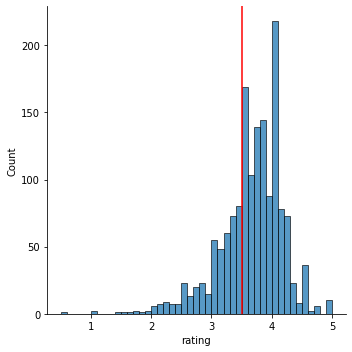

In [ ]:
sns.displot(df[target]);
plt.axvline(3.5, color='red');

In [ ]:
df['recommend'] = df[target] >= 3.5
df['recommend'].nunique()
df['recommend']

0        True
1       False
2       False
3       False
4       False
        ...  
1549     True
1550    False
1551     True
1552     True
1553     True
Name: recommend, Length: 1554, dtype: bool

분포를 관찰하고, not recommended의 기준은 3.5로 설정한다

### 4) 사용할 평가지표는 무엇인지 선택하고 이유를 설명합니다.
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.

In [ ]:
df['recommend'].value_counts(normalize=True)


True     0.70592
False    0.29408
Name: recommend, dtype: float64

다수 클래스의 비율이 70퍼센트 정도이므로, 일단 accracy로 진단해보자

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

### 5) 훈련/검증/테스트 데이터를 어떻게 나눌것인지요?
- 이상치(outliers)가 있다면 어떻게 처리할 것인지요?
- 무작위로 or 시간에 따라 데이터를 나눌 것인지요? 

1. target 데이터의 스케일이 크게 차이나지 않고(min ~ max가 0 ~ 5 사이이다.) outlier의 수가 작으므로 따로 처리하지 않는다.
2. 영화에 대한 만족도는 시대의 영향을 받지 않으므로 무작위로 데이터를 나눈다.

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2, random_state=2)
train.shape, val.shape

((1243, 6), (311, 6))

### 6) 데이터를 전처리 해 봅시다.


In [ ]:
#문제 1) 전 전처리 과정 참고 부탁드립니다.

### 7) 정보 누수(leakage)가 있는지 확인해 봅시다.

In [ ]:
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

features = df.columns.drop([target,'rating'])
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [ ]:
X_train

,movieId,title,genres,tag
1217,8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,Doc Ock
256,1079,"Fish Called Wanda, A (1988)",Comedy|Crime,fish
212,931,Spellbound (1945),Mystery|Romance|Thriller,amnesia
259,1082,"Candidate, The (1972)",Drama,politics
1417,71535,Zombieland (2009),Action|Comedy|Horror,"Bill Murray, dark comedy, Emma Stone, funny, J..."
...,...,...,...,...
466,1959,Out of Africa (1985),Drama|Romance,"adultery, Africa"
299,1212,"Third Man, The (1949)",Film-Noir|Mystery|Thriller,"ferris wheel, Venice, zither"
493,2066,Out of the Past (1947),Film-Noir,memory
527,2249,My Blue Heaven (1990),Comedy,Mafia


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = make_pipeline(
    OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5,class_weight='balanced', random_state=2)
    #RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
    
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.617363344051447


leakage가 의심되는 정확도는 일단 아니다. classification matrix를 확인해보자

Text(0.5, 1.0, 'Confusion matrix, n = 311')

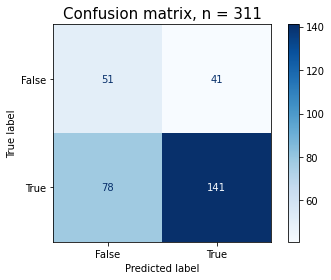

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

balanced class_weight를 설정한 결과, label간 recall precision 격차는 좀 줄일 수 있었지만, base model probability보다는 accuracy가 안좋게 나왔다. 추후, 추가적인 데이터 전처리를 통해서 모델을 개선해볼 예정이다.

In [ ]:
from sklearn.metrics import classification_report
y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

       False       0.40      0.55      0.46        92
        True       0.77      0.64      0.70       219

    accuracy                           0.62       311
   macro avg       0.59      0.60      0.58       311
weighted avg       0.66      0.62      0.63       311



rating, recommend를 제외한 training set에서 leakage를 유발할 요소는 없어보인다.